## NO2, Land Use/Land Cover Change, and Human Modification Concentration in Kumasi and Accra

In [1]:
ls

Ashanti_GreaterAccra_HumanModification.tif*
Ashanti_GreaterAccra_LST_2019_2024.tif*
Ashanti_GreaterAccra_NO2_2019_06.tif*
Certainly.docx*
Combined_NDVI_Ashanti_GreaterAccra_2019_2024.tif*
factors-influencing-spatiotemporal-variability-of-n-o2-concentration-in-urban-area-a-gis-and-remote-sensing-based-approach.pdf*
ORIGINAL_LULC_Sentinel2_RGB_Ashanti_GreaterAccra_2019_2024-0000000000-0000000000.tif*
ORIGINAL_LULC_Sentinel2_RGB_Ashanti_GreaterAccra_2019_2024-0000000000-0000006656.tif*
Untitled.ipynb


In [ ]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import pandas as pd


In [ ]:
files = {
    'Human Modification': 'Ashanti_GreaterAccra_HumanModification.tif',
    'LST (2019-2024)': 'Ashanti_GreaterAccra_LST_2019_2024.tif',
    'NO2 (2019-06)': 'Ashanti_GreaterAccra_NO2_2019_06.tif',
    'Combined NDVI': 'Combined_NDVI_Ashanti_GreaterAccra_2019_2024.tif',
    'LULC Sentinel2 RGB 1': 'ORIGINAL_LULC_Sentinel2_RGB_Ashanti_GreaterAccra_2019_2024-0000000000-0000000000.tif',
    'LULC Sentinel2 RGB 2': 'ORIGINAL_LULC_Sentinel2_RGB_Ashanti_GreaterAccra_2019_2024-0000000000-0000006656.tif'
}

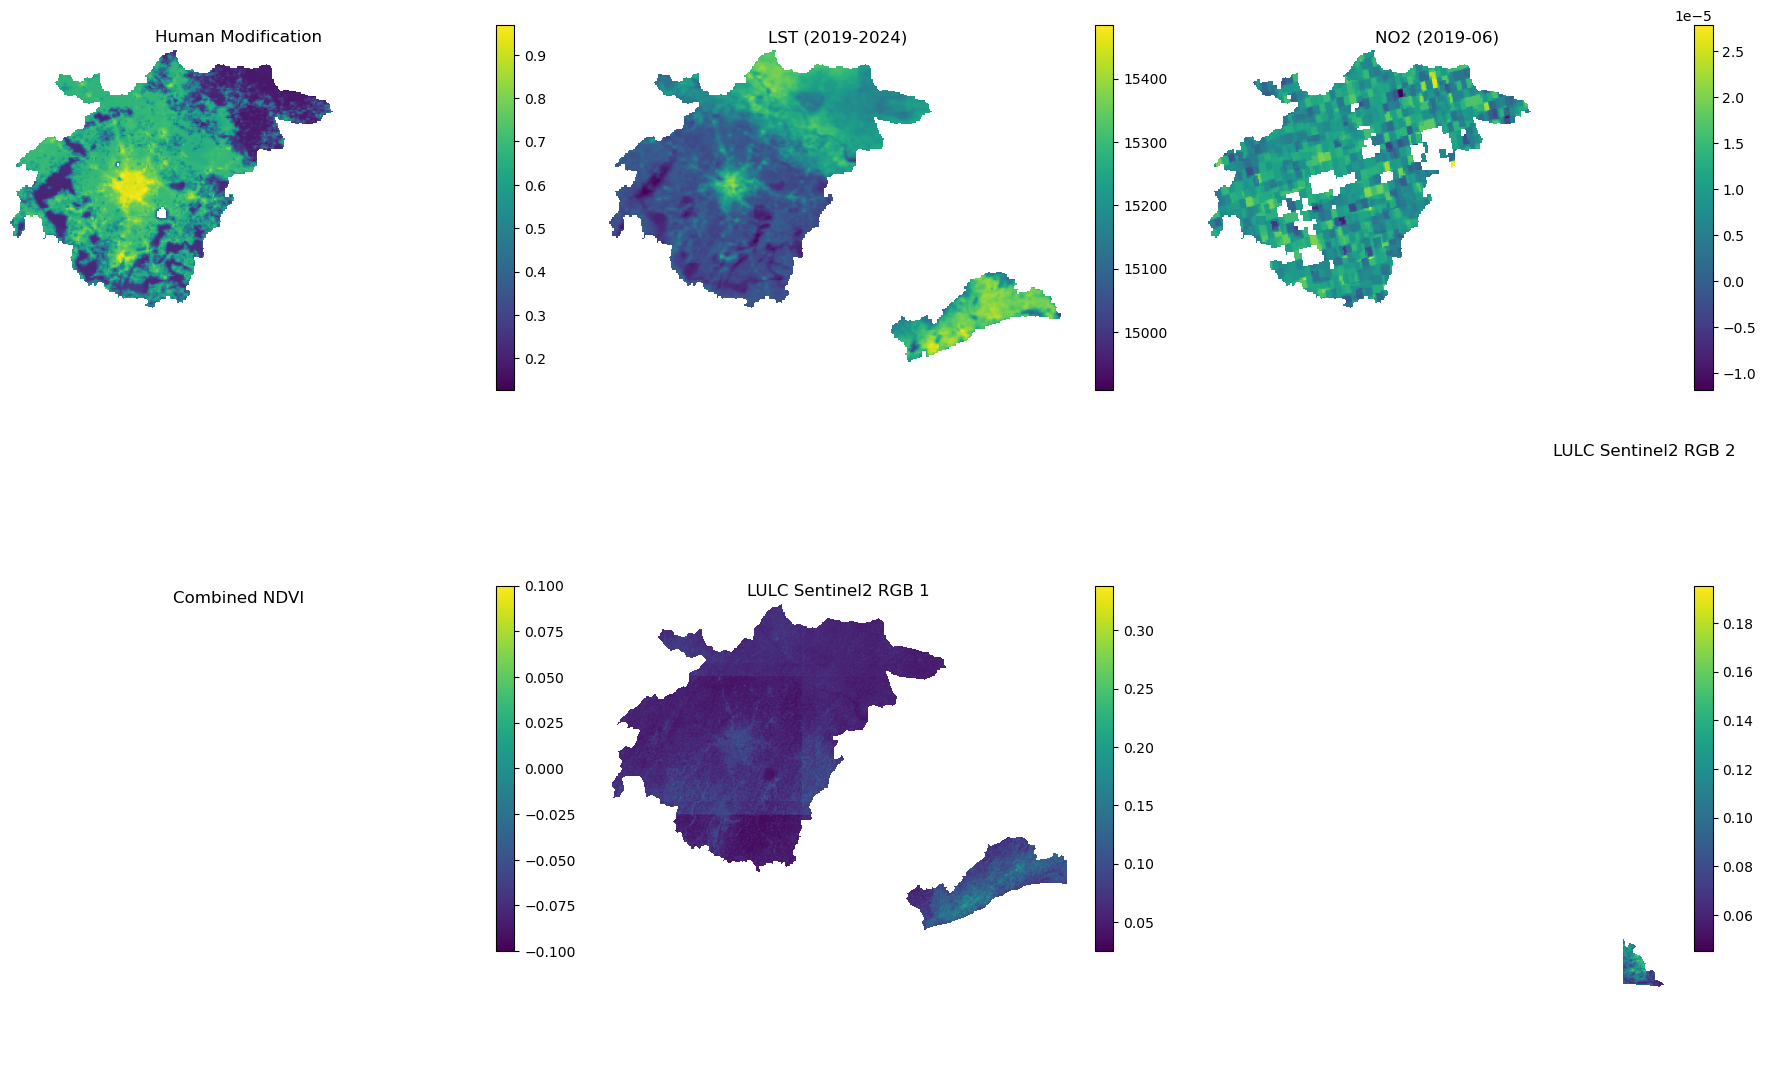

In [17]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
for i, (title, file_path) in enumerate(files.items()):
    with rasterio.open(file_path) as src:
        data = src.read(1) 
        ax = axes[i // 3, i % 3]  
        img = ax.imshow(data, cmap='viridis')  
        ax.set_title(title)
        ax.axis('off')  
        fig.colorbar(img, ax=ax, shrink=0.6)  

plt.tight_layout()
plt.savefig('NO2_CONCENTRATION.png',dpi=500)
plt.show()


In [ ]:
def read_raster(file_path):
    with rasterio.open(file_path) as src:
        data = src.read(1)  
        return data.flatten()  


no2_data = read_raster('Ashanti_GreaterAccra_NO2_2019_06.tif')

parameters = {
    'LST (2019-2024)': 'Ashanti_GreaterAccra_LST_2019_2024.tif',
    'Combined NDVI': 'Combined_NDVI_Ashanti_GreaterAccra_2019_2024.tif',
    'Human Modification': 'Ashanti_GreaterAccra_HumanModification.tif',
}


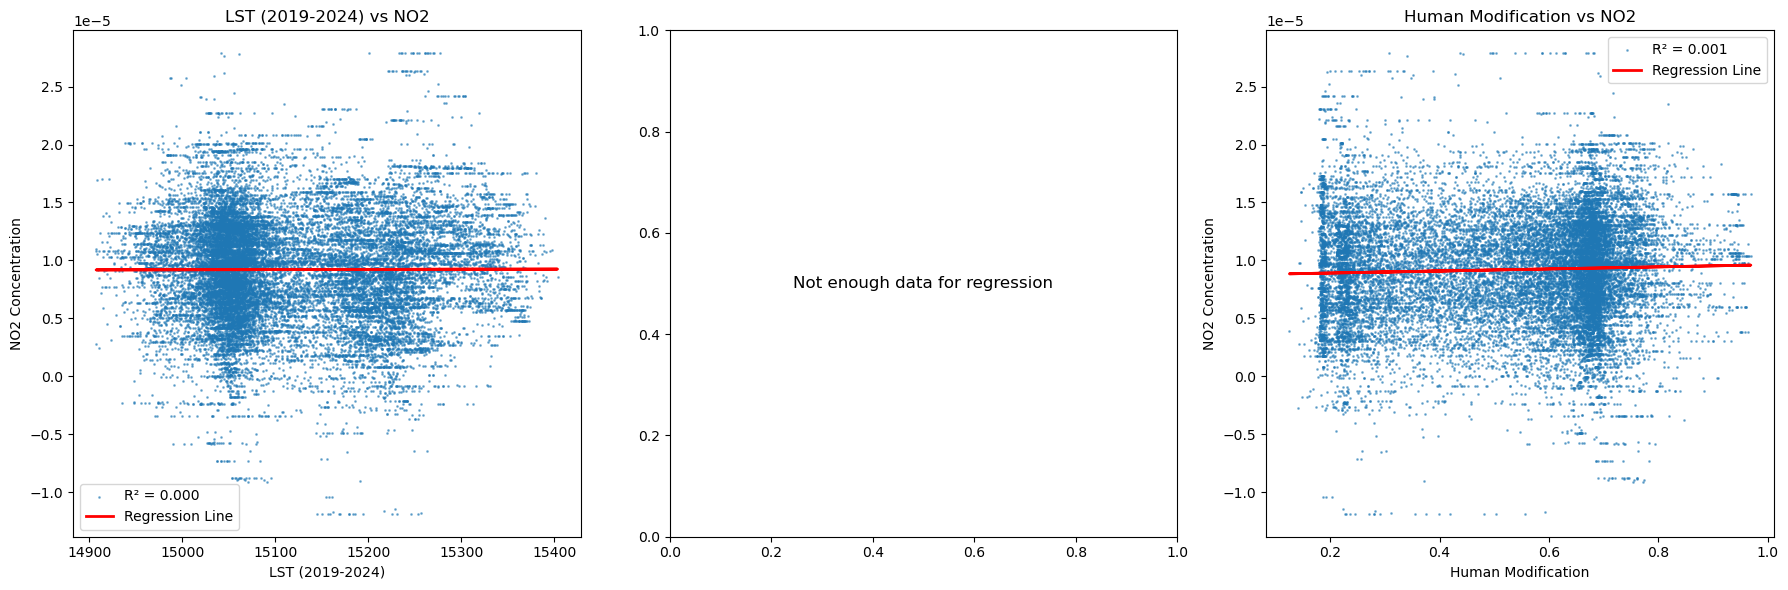


Regression Summary:

            Parameter        R²         Slope  Intercept
0     LST (2019-2024)  0.000009  1.409577e-10   0.000007
1  Human Modification  0.001363  8.863134e-07   0.000009


In [27]:

regression_results = []

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, (param_name, param_file) in enumerate(parameters.items()):
    param_data = read_raster(param_file)

    mask = ~np.isnan(no2_data) & ~np.isnan(param_data)
    x = param_data[mask].reshape(-1, 1) 
    y = no2_data[mask]  

    if len(x) > 0 and len(y) > 0:
        model = LinearRegression()
        model.fit(x, y)
        y_pred = model.predict(x)

        r2 = r2_score(y, y_pred)
        slope = model.coef_[0]
        intercept = model.intercept_

        regression_results.append({
            'Parameter': param_name,
            'R²': r2,
            'Slope': slope,
            'Intercept': intercept
        })
        ax = axes[i]
        ax.scatter(x, y, alpha=0.5, s=1, label=f'R² = {r2:.3f}')
        ax.plot(x, y_pred, color='red', linewidth=2, label='Regression Line')
        ax.set_title(f'{param_name} vs NO2')
        ax.set_xlabel(param_name)
        ax.set_ylabel('NO2 Concentration')
        ax.legend()
    else:
        axes[i].text(0.5, 0.5, 'Not enough data for regression', ha='center', va='center', fontsize=12)

plt.tight_layout()
plt.savefig('regression.png')
plt.show()
regression_df = pd.DataFrame(regression_results)
print("\nRegression Summary:\n")
print(regression_df)
